<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21619" size=6px>                   
                    <b>  Retail 
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=4.5px>                   
                    <b>  
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=2px>                                      
                    <b> 
                    <br>    
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=4px>                   
                    <b>  Time Series Forecasting 
                    </b>
                </font>
            </div>
         </td>
    </tr>
</table>

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4.8px>                   
                    <b>  Author 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

* Rubina Bansal

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Problem Statement  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Forecast customer footfall for retail store chains to help optimize staffing, inventory management, and promotional strategies.

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Dataset Description   
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

The data for 50 Retail Stores is available. The data consists of customers visiting a particluar store on a given day which is the most important to us. Other information available is:
<br>
`Store id`: a unique ID for each store           <br>
`Day of Week`        <br>
`Date`               <br> 
`Customers`: the number of customers on a given day.(Target Variable)                  <br>
`Open`: an indicator for whether the store was open: 0 = closed, 1 = open.             <br>
`Promotion`: indicates whether a store is running a promo on that day.                     <br>
`State Holiday`: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. This has value as "0", "a", "b", "c"                                                            <br>
`School Holiday`: indicates if the (Store, Date) was affected by the closure of public schools.

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4.8px>                   
                    <b>  Objective 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

* Using different TimeSeries Forecasting techniques, try to forecast the customer footfall across various retail stores.

# Video-Time Series Analysis_EDA_Hands-on-Code

In [78]:
# Import packages
import numpy as np
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#statistics
from statsmodels.distributions.empirical_distribution import ECDF

# timse series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings('ignore')

In [79]:
# Import data 
df = pd.read_excel('Store_50-1.xlsx')
df.head()

,Store,Day Of Week,Date,Customers,Open,Promotion,State Holiday,School Holiday
0,1044,1,5/31/2016,884,1,1,0,0
1,1041,1,5/31/2016,1032,1,1,0,1
2,1036,1,5/31/2016,1070,1,1,0,0
3,1047,1,5/31/2016,2043,1,1,0,0
4,1012,1,5/31/2016,1239,1,1,0,0


In [80]:
df = pd.read_excel('Store_50-1.xlsx', parse_dates = True, index_col = 'Date')
df.head()

,Store,Day Of Week,Customers,Open,Promotion,State Holiday,School Holiday
Date,,,,,,,
2016-05-31,1044,1,884,1,1,0,0
2016-05-31,1041,1,1032,1,1,0,1
2016-05-31,1036,1,1070,1,1,0,0
2016-05-31,1047,1,2043,1,1,0,0
2016-05-31,1012,1,1239,1,1,0,0


In [81]:
# Check if the date has been defined as an index
df.index

DatetimeIndex(['2016-05-31', '2016-05-31', '2016-05-31', '2016-05-31',
               '2016-05-31', '2016-05-31', '2016-05-31', '2016-05-31',
               '2016-05-31', '2016-05-31',
               ...
               '2014-01-01', '2014-01-01', '2014-01-01', '2014-01-01',
               '2014-01-01', '2014-01-01', '2014-01-01', '2014-01-01',
               '2014-01-01', '2014-01-01'],
              dtype='datetime64[ns]', name='Date', length=43326, freq=None)

In [82]:
df.shape

(43326, 7)

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  EXPLORATORY DATA ANALYSIS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [83]:
# Extracting some additional features
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['WeekOfYear'] = df.index.weekofyear
df.head()

,Store,Day Of Week,Customers,Open,Promotion,State Holiday,School Holiday,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,
2016-05-31,1044,1,884,1,1,0,0,2016,5,31,22
2016-05-31,1041,1,1032,1,1,0,1,2016,5,31,22
2016-05-31,1036,1,1070,1,1,0,0,2016,5,31,22
2016-05-31,1047,1,2043,1,1,0,0,2016,5,31,22
2016-05-31,1012,1,1239,1,1,0,0,2016,5,31,22


<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=2px>                   
                    <b>  Empirical Cumulative Distribution Plot
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

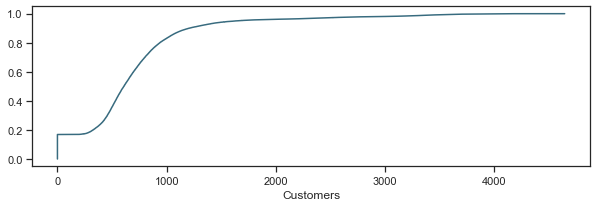

In [84]:
# Plot ECDF: Empirical Cumulative Distribution Function
sns.set(style = 'ticks')
c = '#386B7F'
plt.figure(figsize = (10,10))

plt.subplot(312)
cdf = ECDF(df['Customers'])
plt.plot(cdf.x, cdf.y, label='statmodels', color = c)
plt.xlabel('Customers')
plt.show()

About 20% of the days we see zero customers. Maybe the store was closed on that day.

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=2px>                   
                    <b>  Check if we have records where the store was open and customer fall was zero
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [85]:
df[(df.Open ==1) & (df.Customers == 0)]

,Store,Day Of Week,Customers,Open,Promotion,State Holiday,School Holiday,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,
2015-02-13,1047,4,0,1,0,0,0,2015,2,13,7
2015-12-02,1047,3,0,1,0,0,0,2015,12,2,49
2014-07-02,1011,4,0,1,1,0,0,2014,7,2,27


As such records are less and we do not know the specific reason why there was no customer even if the store was open, we are not deleting such records.

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=2px>                   
                    <b>  Check for missing values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [86]:
df.isnull().sum()

Store             0
Day Of Week       0
Customers         0
Open              0
Promotion         0
State Holiday     0
School Holiday    0
Year              0
Month             0
Day               0
WeekOfYear        0
dtype: int64

No missing values are present in the data

In [87]:
# Rename columns to remove space
df.rename( columns = {
    'Day Of Week': 'DayOfWeek', 'State Holiday': 'StateHoliday',
    'School Holiday': 'SchoolHoliday'}, inplace = True)

In [88]:
df.head()

,Store,DayOfWeek,Customers,Open,Promotion,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,
2016-05-31,1044,1,884,1,1,0,0,2016,5,31,22
2016-05-31,1041,1,1032,1,1,0,1,2016,5,31,22
2016-05-31,1036,1,1070,1,1,0,0,2016,5,31,22
2016-05-31,1047,1,2043,1,1,0,0,2016,5,31,22
2016-05-31,1012,1,1239,1,1,0,0,2016,5,31,22


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43326 entries, 2016-05-31 to 2014-01-01
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          43326 non-null  int64 
 1   DayOfWeek      43326 non-null  int64 
 2   Customers      43326 non-null  int64 
 3   Open           43326 non-null  int64 
 4   Promotion      43326 non-null  int64 
 5   StateHoliday   43326 non-null  object
 6   SchoolHoliday  43326 non-null  int64 
 7   Year           43326 non-null  int64 
 8   Month          43326 non-null  int64 
 9   Day            43326 non-null  int64 
 10  WeekOfYear     43326 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 4.0+ MB


<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=2px>                   
                    <b>  Trend Analysis: based on day of week and promotion
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

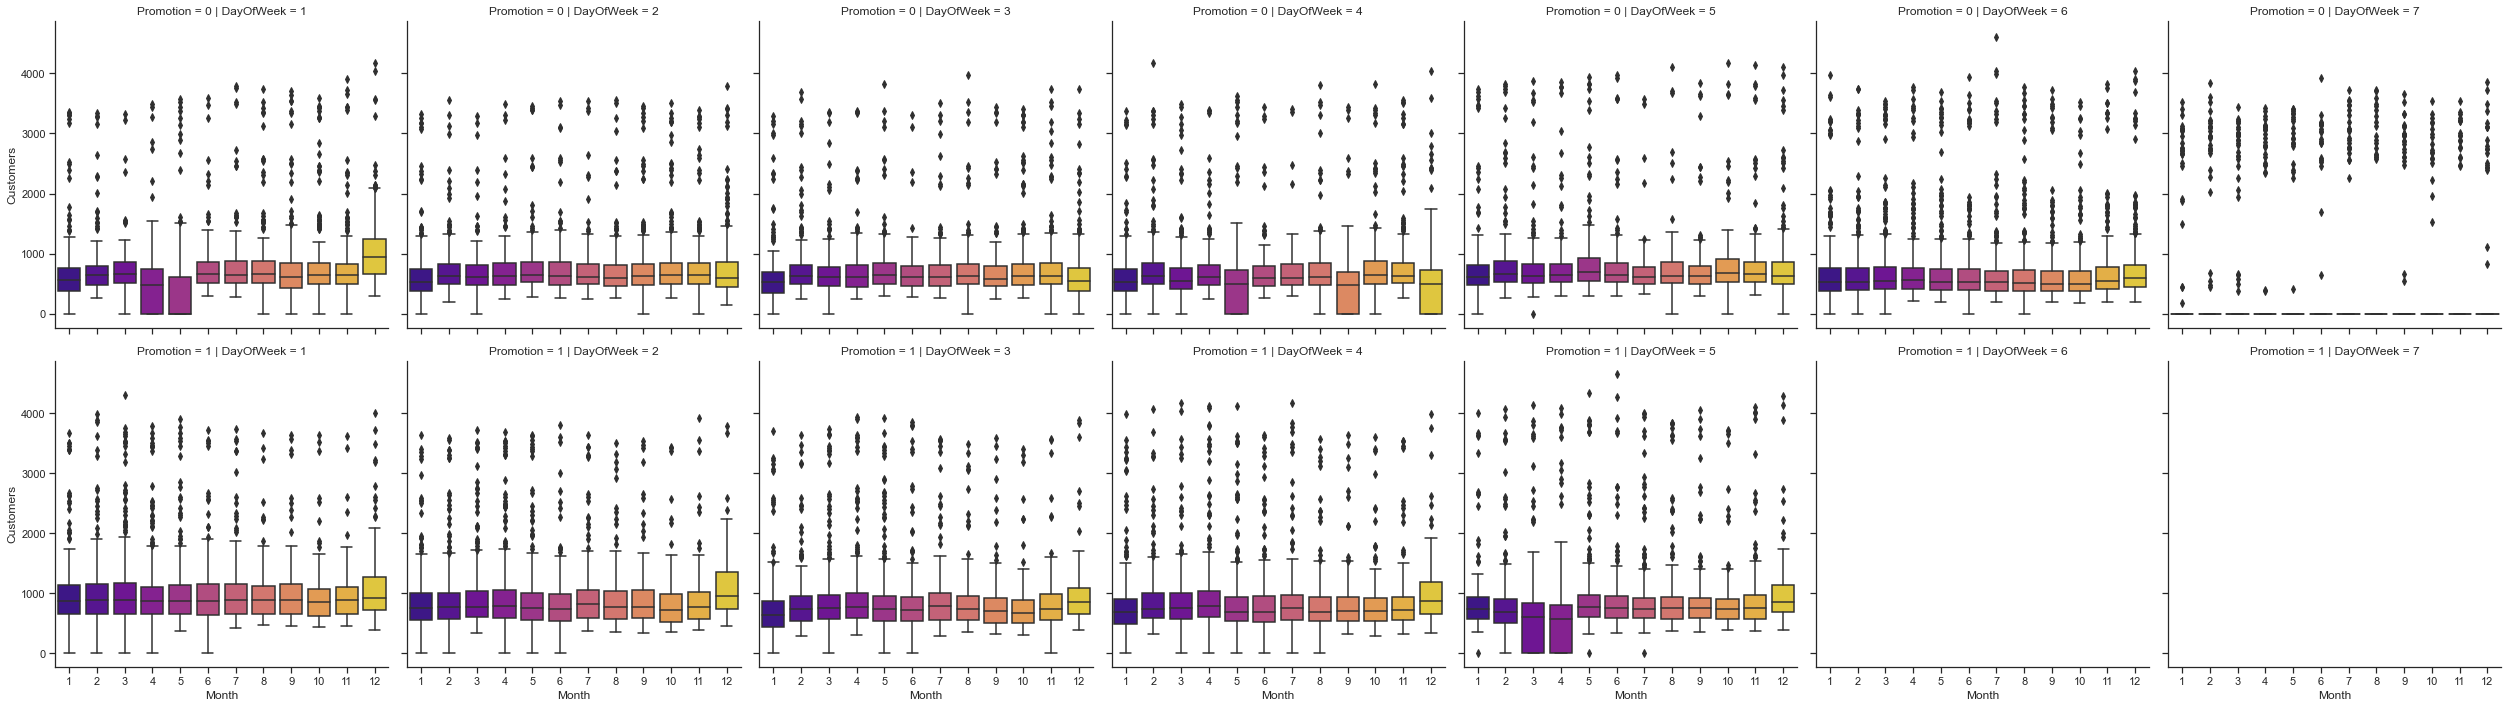

In [90]:
#Customer trends based on day of week and promotion
sns.catplot( data = df, x = 'Month', y = 'Customers',
           col = 'DayOfWeek', palette = 'plasma', row='Promotion',
           kind = 'box', color = c)
plt.show()

Impact of the promotion is clearly visible even across month.. Day1 , Month 1, Promotion=1, customer count is high. However for December, no impact of promotion.

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=2px>                   
                    <b>  Check the stores which are open on Sundays
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [91]:
# Check the stores which are open on Sundays
df[(df.Open == 1) & (df.DayOfWeek == 7)]['Store'].unique()

array([1011, 1016, 1015], dtype=int64)

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=2px>                   
                    <b>  Trend Analysis: for different days of week
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

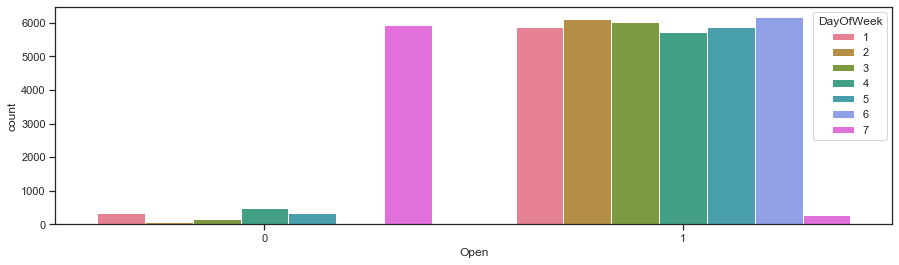

In [92]:
fig, axis1 = plt.subplots(1,1, figsize = (15,4))
sns.countplot(x = 'Open', hue = 'DayOfWeek', data = df, palette = 'husl', ax = axis1)
plt.show()

Even when the store was closed we see that the footfall count was high on Sunday. Even for other days when the store was not open, the count of customers is not zero.

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=2px>                   
                    <b>  Plot average Customers over time(year-month) & percent change in customers
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

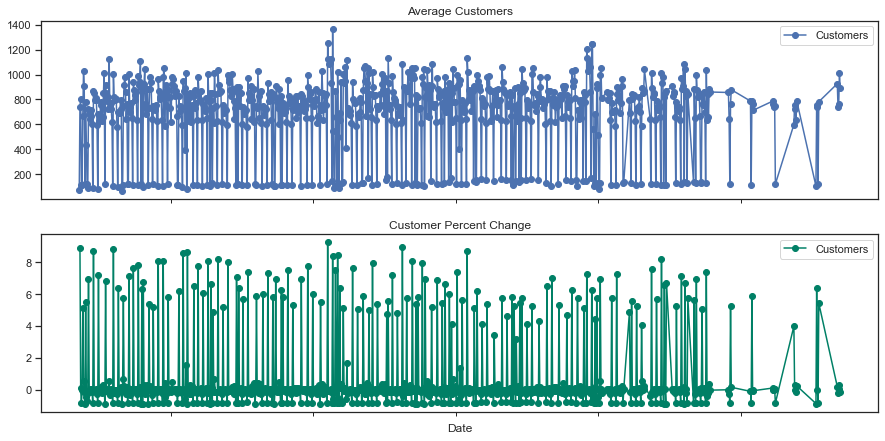

In [93]:
# group by date and get average Customers, and precent change
average_customers    = df.groupby('Date')["Customers"].mean()
pct_change_customers = df.groupby('Date')["Customers"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Customers over time(year-month)
ax1 = average_customers.plot(legend=True,ax=axis1,marker='o',title="Average Customers")
ax1.set_xticks(range(len(average_customers)))
ax1.set_xticklabels(average_customers.index.tolist(), rotation=90)
# plot precent change for Customers over time(year-month)
ax2 = pct_change_customers.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Customer Percent Change")


 Much of the variation is visible across specific days of the week and specific months in a year.

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=2px>                   
                    <b>  Plot average customers for every year
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

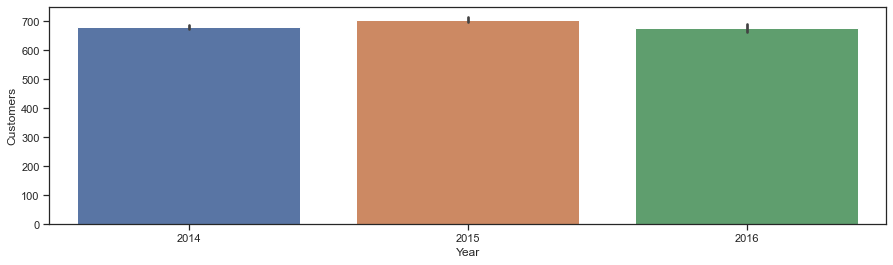

In [94]:
plt.figure(figsize = (15,4))
sns.barplot(x='Year', y = 'Customers', data = df)
plt.show()

There is not much variation for the customer footfall per year.

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=2px>                   
                    <b>  Plot average customers with and without promotion
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

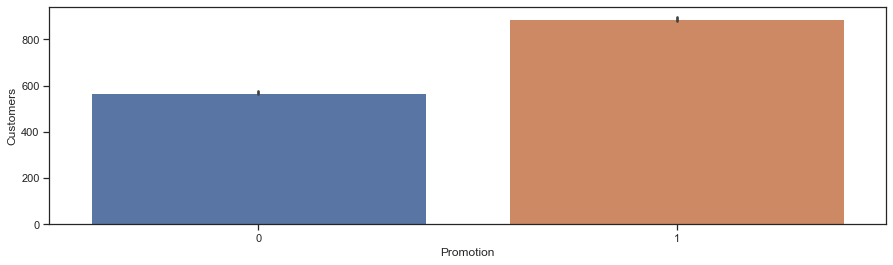

In [95]:
fig, axis1 = plt.subplots(1,figsize=(15,4))

sns.barplot(x='Promotion', y='Customers', data=df, ax=axis1);
plt.show()

Having a Promotion does have an impact on the customer count.

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=2px>                   
                    <b>  State Holiday
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

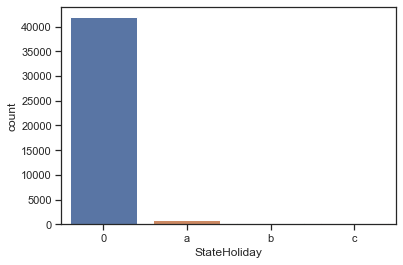

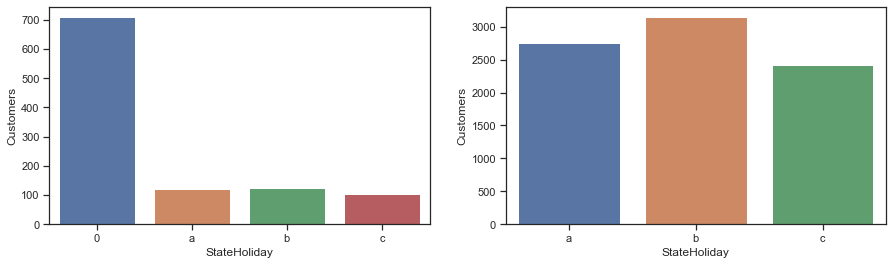

In [96]:
# StateHoliday column has values 0 & "0", So, we need to merge values with 0 to "0"
df["StateHoliday"].loc[df["StateHoliday"] == 0] = "0"

#Plotting the count of different types of State Holidays
sns.countplot(x='StateHoliday', data=df);

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

#Plotting a barplot of Customers with respect to different types of State Holiday
sns.barplot(x='StateHoliday', y='Customers', data=df, ax=axis1,ci=None);

#Plotting an instance when the State Holiday is not equal 0 but the Customer count is 0
mask = (df["StateHoliday"] != "0") & (df["Customers"] > 0)
sns.barplot(x='StateHoliday', y='Customers', data=df[mask], ax=axis2,ci=None);

Customer count is highest when Stateholiday=0.

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=2px>                   
                    <b>  School Holiday
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

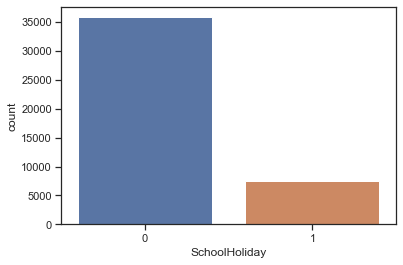

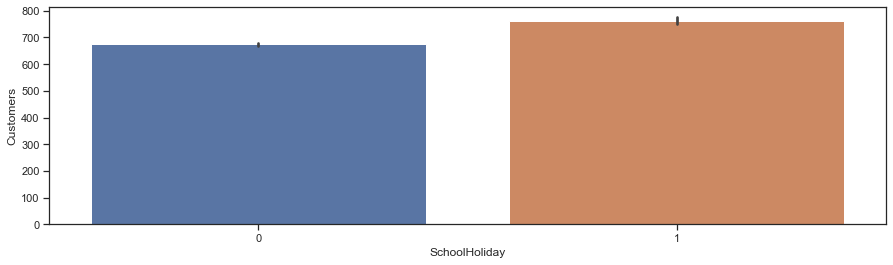

In [97]:
# Plotting the count of School Holidays
sns.countplot(x='SchoolHoliday', data=df);

fig, (axis1) = plt.subplots(1,figsize=(15,4))

#Plotting the average number of Customers with respect to the School Holiday
sns.barplot(x='SchoolHoliday', y='Customers', data=df, ax=axis1);

When there is a school holiday, the customer count is more.

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=2px>                   
                    <b>  Correlation Analysis
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

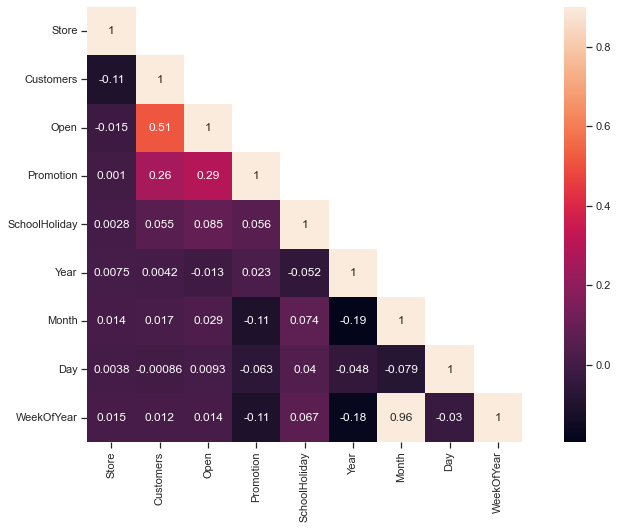

In [98]:
corr_all = df.drop('DayOfWeek', axis = 1).corr()
mask = np.array(corr_all)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr_all, mask=mask,vmax=.9, square=True,annot=True);
plt.show()

Open and Customers are highly correlated - This was expected. Day of the week is dropped from this correlation plot as ideally Day of the Week is a categorical type of variable
Similarly Month, Day, Year should be read with respect to negative values, as these are being considered as integer wherein the values does not represent any kind of order

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Considering the first store i.e. Store id = 1044 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

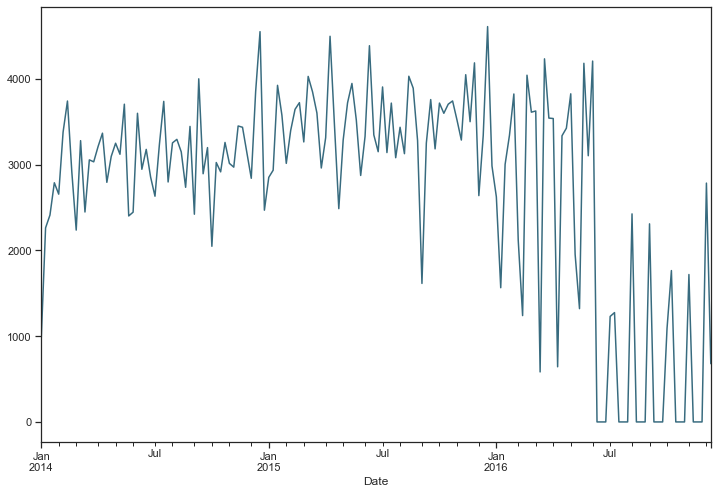

In [99]:
# store types
df_1044 = df[df.Store == 1044]['Customers']. sort_index(ascending=True)
f, (ax1) = plt.subplots(1, figsize = (12, 8))
df_1044.resample('W').sum().plot(color = c, ax = ax1)

plt.show()

Seasonality does exists in the data set. The store had a peak in December and May.

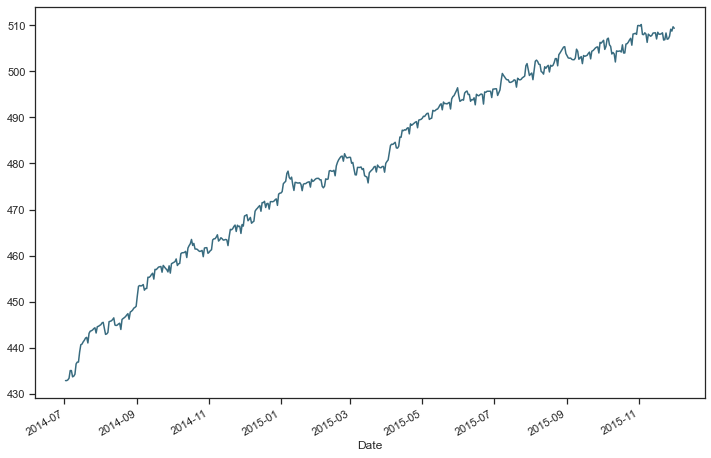

In [100]:
# Let's check the trend in the data set
decomposition_a = seasonal_decompose(df_1044, model = 'additive', period = 365)
f, ax1 = plt.subplots(1, figsize = (12, 8))
decomposition_a.trend.plot(color = c, ax = ax1)
plt.show()

There seems to be an increase in customer footfall year on year.

In [101]:
df_1044 = df[df.Store == 1044]['Customers']. sort_index(ascending=True)

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=2px>                   
                    <b>  ACF: Auto-Correlation Function
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

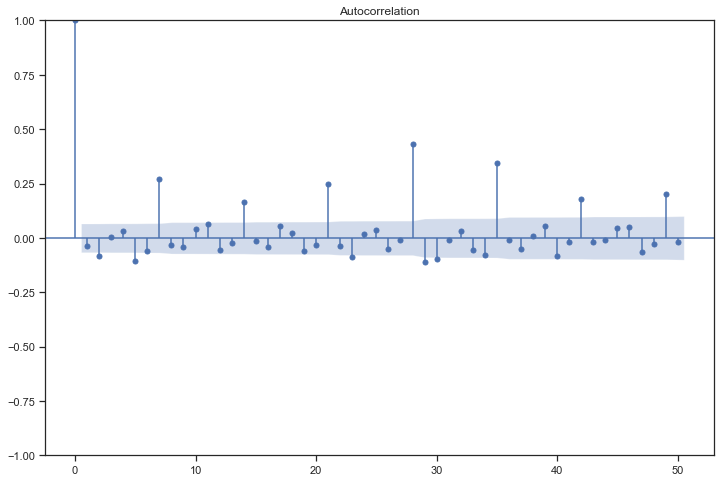

In [102]:
plt.figure(figsize = (12,8))
plot_acf(df_1044, lags=50, ax = plt.gca())
plt.show()

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=2px>                   
                    <b>  PACF: Partial Auto-Correlation Function
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

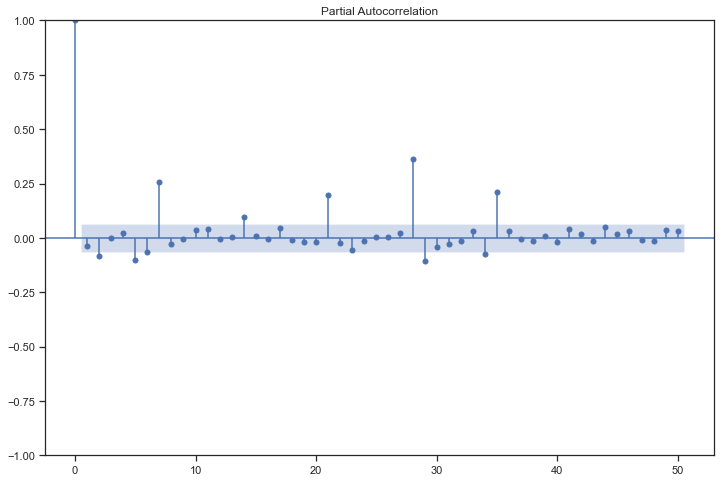

In [103]:
plt.figure(figsize=(12,8))
plot_pacf(df_1044, lags=50, ax = plt.gca())
plt.show()

**Seasonality after certain lags is visible. Every 7th day**

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Model Building
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=2px>                   
                    <b>  Data is being read again for model. This time no index is created while loading the data. First time when the data was read, index was used so that specific EDA can be done.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [104]:
Store50 = pd.read_excel('Store_50-1.xlsx', parse_dates = True)

In [105]:
# Extract customers only for Store 1044 and the model will be built for these customers
Store_1044 = Store50[Store50.Store == 1044]

# reverse to the order: from 2013 to 2015
Store_1044 = Store_1044.sort_index(ascending = False)

In [106]:
Store_1044.head()

,Store,Day Of Week,Date,Customers,Open,Promotion,State Holiday,School Holiday
43275,1044,2,2014-01-01 00:00:00,0,0,0,a,1
43224,1044,3,2014-02-01 00:00:00,481,1,0,0,1
43173,1044,4,2014-03-01 00:00:00,453,1,0,0,1
43122,1044,5,2014-04-01 00:00:00,497,1,0,0,1
43071,1044,6,2014-05-01 00:00:00,450,1,0,0,0


In [107]:
Store_1044.rename(columns = {"Day Of Week": "DayOfWeek", "State Holiday":"StateHoliday","School Holiday":"SchoolHoliday"}, 
                      inplace = True) 

In [108]:
Store_1044['Date'] = pd.to_datetime(Store_1044['Date'])

In [109]:
Store_1044['Year'] = Store_1044['Date'].dt.year

In [110]:
Store_1044.head()

,Store,DayOfWeek,Date,Customers,Open,Promotion,StateHoliday,SchoolHoliday,Year
43275,1044,2,2014-01-01,0,0,0,a,1,2014
43224,1044,3,2014-02-01,481,1,0,0,1,2014
43173,1044,4,2014-03-01,453,1,0,0,1,2014
43122,1044,5,2014-04-01,497,1,0,0,1,2014
43071,1044,6,2014-05-01,450,1,0,0,0,2014


In [111]:
train = Store_1044[Store_1044['Year'] != 2016]
test  = Store_1044[Store_1044['Year'] == 2016]

In [112]:
train_mod = train[['Date', 'Customers']]
test_mod  = test[['Date', 'Customers']]

In [113]:
print(train.shape)
print(test.shape)

(730, 9)
(152, 9)


In [114]:
# Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller

In [115]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd  = timeseries.rolling(window=7).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std  = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block = False)
    
    #Perform Dicky Fuller Test
    print('Results of Dicky-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput, '\n')

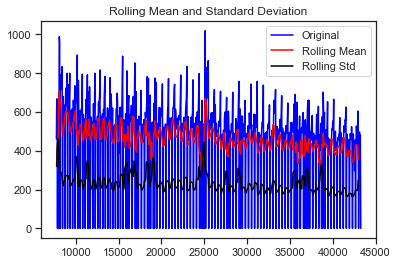

Results of Dicky-Fuller Test:
Test Statistic                  -2.872975
p-value                          0.048582
#Lags Used                      20.000000
Number of Observations Used    709.000000
Critical Value (1%)             -3.439607
Critical Value (5%)             -2.865625
Critical Value (10%)            -2.568945
dtype: float64 



In [116]:
test_stationarity(train['Customers'])

**Series is stationary and hence no need for differentiation**

In [117]:
import itertools
p = q = range(0,3)
d = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [ (x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

In [118]:
#Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [119]:
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

In [120]:
for param in pdq:
    ARIMA_model = ARIMA(train['Customers'], order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param': param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:10018.497355513635
ARIMA(0, 0, 1) - AIC:9999.149868904264
ARIMA(0, 0, 2) - AIC:9993.000655983284
ARIMA(1, 0, 0) - AIC:10004.030374628735
ARIMA(1, 0, 1) - AIC:9994.575024383867
ARIMA(1, 0, 2) - AIC:9961.499510067668
ARIMA(2, 0, 0) - AIC:9993.941788421156
ARIMA(2, 0, 1) - AIC:9995.558354808587
ARIMA(2, 0, 2) - AIC:9963.480234968003


In [121]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
5,"(1, 0, 2)",9961.49951
8,"(2, 0, 2)",9963.480235
2,"(0, 0, 2)",9993.000656
6,"(2, 0, 0)",9993.941788
4,"(1, 0, 1)",9994.575024
7,"(2, 0, 1)",9995.558355
1,"(0, 0, 1)",9999.149869
3,"(1, 0, 0)",10004.030375
0,"(0, 0, 0)",10018.497356


In [122]:
# ARIMA(1,0,2) has the lowest AIC
best_model = ARIMA(train['Customers'], order=(1,0,2))

results_Arima = best_model.fit()

print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:              Customers   No. Observations:                  730
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -4975.750
Date:                Mon, 20 May 2024   AIC                           9961.500
Time:                        21:19:45   BIC                           9984.465
Sample:                             0   HQIC                          9970.360
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        464.6821      9.101     51.058      0.000     446.844     482.520
ar.L1         -0.7465      0.058    -12.956      0.000      -0.859      -0.634
ma.L1          0.6234      0.062     10.092      0.0

In [123]:
test['Customers'] = test['Customers'].astype(float)
final_hat_avg = test.copy()
pred = results_Arima.forecast(steps = 152)

In [124]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test['Customers'], pred, squared=False)

In [125]:
print(rmse)

271.65867643638455


In [126]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(1,0,2)'])

resultsDf

,RMSE
"ARIMA(1,0,2)",271.658676


<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=3px>                   
                    <b>  As the dataset has seasonality, let's build the model with SARIMA
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [127]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [128]:
SARIMA_AIC

,param,seasonal,AIC


In [129]:
import statsmodels.api as sm

In [130]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Customers'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:11185.950413292372
SARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:10518.569230074707
SARIMA(0, 0, 0)x(0, 0, 2, 7)7 - AIC:10040.609277392865
SARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:9521.374457632435
SARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:9016.22683186194
SARIMA(0, 0, 0)x(1, 0, 2, 7)7 - AIC:8914.949176593645
SARIMA(0, 0, 0)x(2, 0, 0, 7)7 - AIC:9122.879538850024
SARIMA(0, 0, 0)x(2, 0, 1, 7)7 - AIC:8919.558922752429
SARIMA(0, 0, 0)x(2, 0, 2, 7)7 - AIC:8885.374418185114
SARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC:10844.339587952096
SARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC:10277.416370385516
SARIMA(0, 0, 1)x(0, 0, 2, 7)7 - AIC:9913.184015362185
SARIMA(0, 0, 1)x(1, 0, 0, 7)7 - AIC:9508.331991534833
SARIMA(0, 0, 1)x(1, 0, 1, 7)7 - AIC:8963.908110238403
SARIMA(0, 0, 1)x(1, 0, 2, 7)7 - AIC:8874.4625300708
SARIMA(0, 0, 1)x(2, 0, 0, 7)7 - AIC:9124.566045237203
SARIMA(0, 0, 1)x(2, 0, 1, 7)7 - AIC:8893.468031226514
SARIMA(0, 0, 1)x(2, 0, 2, 7)7 - AIC:8865.994539871092
SARIMA(0, 0, 2)x(0, 0, 0, 

In [131]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
17,"(0, 0, 1)","(2, 0, 2, 7)",8865.99454
62,"(2, 0, 0)","(2, 0, 2, 7)",8867.989266
14,"(0, 0, 1)","(1, 0, 2, 7)",8874.46253
34,"(1, 0, 0)","(2, 0, 1, 7)",8881.355113
8,"(0, 0, 0)","(2, 0, 2, 7)",8885.374418


In [132]:
## SARIMA(0, 0, 1)(2, 0, 2, 7)
mod = sm.tsa.statespace.SARIMAX(train['Customers'],
                                order=(0,0,1),
                                seasonal_order=(2, 0, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                       SARIMAX Results                                        
Dep. Variable:                              Customers   No. Observations:                  730
Model:             SARIMAX(0, 0, 1)x(2, 0, [1, 2], 7)   Log Likelihood               -4426.997
Date:                                Mon, 20 May 2024   AIC                           8865.995
Time:                                        21:22:35   BIC                           8893.420
Sample:                                             0   HQIC                          8876.586
                                                - 730                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0196      0.023      0.836      0.403      -0.026       0.065
ar.

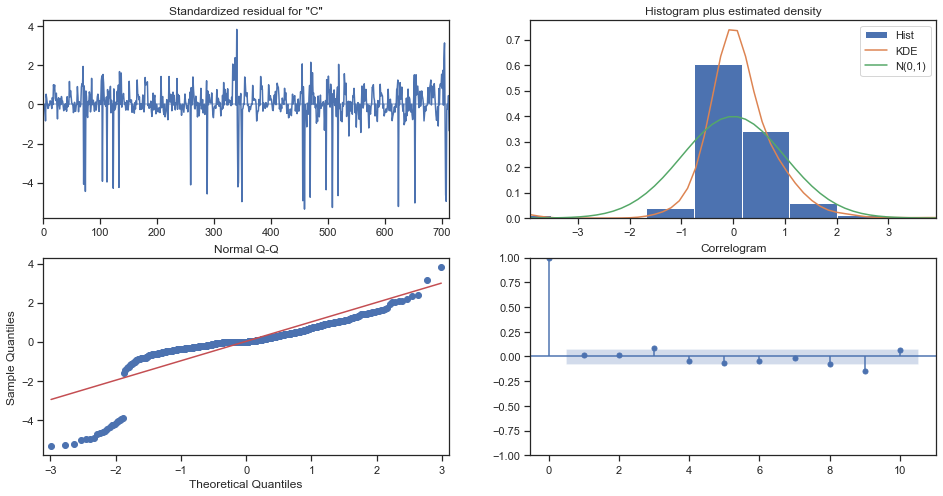

In [133]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

In [134]:
test.head()

,Store,DayOfWeek,Date,Customers,Open,Promotion,StateHoliday,SchoolHoliday,Year
7701,1044,4,2016-01-01,0.0,0,0,a,1,2016
7650,1044,5,2016-02-01,633.0,1,0,0,1,2016
7599,1044,6,2016-03-01,530.0,1,0,0,0,2016
7548,1044,7,2016-04-01,0.0,0,0,0,0,2016
7497,1044,1,2016-05-01,845.0,1,1,0,1,2016


In [135]:
test.Customers= test.Customers.astype(float)
final_hat_avg =test.copy()
pred = results_SARIMA.get_forecast(steps=152)
pred.predicted_mean

730    647.804051
731    707.321588
732    618.242930
733     -0.003245
734    732.203593
          ...    
877    598.651024
878    651.136497
879    633.951578
880     -0.003182
881    757.204322
Name: predicted_mean, Length: 152, dtype: float64

In [136]:
pred.summary_frame()

Customers,mean,mean_se,mean_ci_lower,mean_ci_upper
730,647.804051,117.852568,416.817263,878.790839
731,707.321588,117.875120,476.290598,938.352578
732,618.242930,117.875120,387.211940,849.273920
733,-0.003245,117.875120,-231.034235,231.027745
734,732.203593,117.875120,501.172603,963.234583
...,...,...,...,...
877,598.651024,119.657053,364.127511,833.174538
878,651.136497,119.657056,416.612977,885.660016
879,633.951578,119.657056,399.428059,868.475098
880,-0.003182,119.657056,-234.526701,234.520338


In [137]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test.Customers ,pred.predicted_mean))
print(rmse)

149.54807697536063


In [138]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,0,1)(2,0,2)7'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,RMSE
"ARIMA(1,0,2)",271.658676
"SARIMA(0,0,1)(2,0,2)7",149.548077


<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=3px>                   
                    <b>  To get the real forecast for 7 days, we will rerun the model on the complete dataset for Store_1044
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [139]:
mod = sm.tsa.statespace.SARIMAX(Store_1044['Customers'],
                                order=(0,0,1),
                                seasonal_order=(2, 0, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                       SARIMAX Results                                        
Dep. Variable:                              Customers   No. Observations:                  882
Model:             SARIMAX(0, 0, 1)x(2, 0, [1, 2], 7)   Log Likelihood               -5408.456
Date:                                Mon, 20 May 2024   AIC                          10828.911
Time:                                        21:23:09   BIC                          10857.494
Sample:                                             0   HQIC                         10839.850
                                                - 882                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0063      0.023      0.273      0.785      -0.039       0.051
ar.

In [140]:
pred = results.get_forecast(steps = 7)
pred.predicted_mean

882    668.137828
883    623.444574
884    609.399568
885    641.699139
886    618.920521
887     -0.001046
888    673.429057
Name: predicted_mean, dtype: float64

In [141]:
pred.summary_frame()

Customers,mean,mean_se,mean_ci_lower,mean_ci_upper
882,668.137828,123.284467,426.504713,909.770943
883,623.444574,123.286885,381.806720,865.082428
884,609.399568,123.282991,367.769346,851.029790
885,641.699139,123.282991,400.068917,883.329361
886,618.920521,123.282991,377.290298,860.550743
887,-0.001046,123.282991,-241.631268,241.629176
888,673.429057,123.282991,431.798835,915.059279


# SARIMAX Models

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=3px>                   
                    <b>  This dataset has exogeneous variables and hence the same should be considered while creating the model 
# so to start with let's cretae a subset which only has exogeneous variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=2px>                   
                    <b>  Using Regression Analysis to improve Forecast
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 43275 to 7752
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Store          730 non-null    int64         
 1   DayOfWeek      730 non-null    int64         
 2   Date           730 non-null    datetime64[ns]
 3   Customers      730 non-null    int64         
 4   Open           730 non-null    int64         
 5   Promotion      730 non-null    int64         
 6   StateHoliday   730 non-null    object        
 7   SchoolHoliday  730 non-null    int64         
 8   Year           730 non-null    int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 57.0+ KB


In [66]:
ex_train=train[['Open','Promotion','StateHoliday','SchoolHoliday']]
ex_test=test[['Open','Promotion','StateHoliday','SchoolHoliday']]

In [67]:
## State variable has numeric character which has to be convered
ex_train["StateHoliday"].loc[ex_train["StateHoliday"] == "0"] = 0
ex_train["StateHoliday"].loc[ex_train["StateHoliday"] == "a"] = 1
ex_train["StateHoliday"].loc[ex_train["StateHoliday"] == "b"] = 2
ex_train["StateHoliday"].loc[ex_train["StateHoliday"] == "c"] = 3
ex_train.head()

,Open,Promotion,StateHoliday,SchoolHoliday
43275,0,0,1,1
43224,1,0,0,1
43173,1,0,0,1
43122,1,0,0,1
43071,1,0,0,0


In [68]:
ex_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 43275 to 7752
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Open           730 non-null    int64 
 1   Promotion      730 non-null    int64 
 2   StateHoliday   730 non-null    object
 3   SchoolHoliday  730 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 28.5+ KB


In [69]:
ex_train['StateHoliday'] = ex_train['StateHoliday'].astype('int64')
ex_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 43275 to 7752
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Open           730 non-null    int64
 1   Promotion      730 non-null    int64
 2   StateHoliday   730 non-null    int64
 3   SchoolHoliday  730 non-null    int64
dtypes: int64(4)
memory usage: 28.5 KB


In [70]:
## State variable has numeric character which has to be converted
ex_test["StateHoliday"].loc[ex_test["StateHoliday"] == "0"] = 0
ex_test["StateHoliday"].loc[ex_test["StateHoliday"] == "a"] = 1
ex_test["StateHoliday"].loc[ex_test["StateHoliday"] == "b"] = 2
ex_test["StateHoliday"].loc[ex_test["StateHoliday"] == "c"] = 3
ex_test.head()

,Open,Promotion,StateHoliday,SchoolHoliday
7701,0,0,1,1
7650,1,0,0,1
7599,1,0,0,0
7548,0,0,0,0
7497,1,1,0,1


In [71]:
ex_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 7701 to 0
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Open           152 non-null    int64 
 1   Promotion      152 non-null    int64 
 2   StateHoliday   152 non-null    object
 3   SchoolHoliday  152 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.9+ KB


In [72]:
ex_test['StateHoliday'] = ex_test['StateHoliday'].astype('int64')
ex_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 7701 to 0
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Open           152 non-null    int64
 1   Promotion      152 non-null    int64
 2   StateHoliday   152 non-null    int64
 3   SchoolHoliday  152 non-null    int64
dtypes: int64(4)
memory usage: 5.9 KB


In [73]:
SARIMAX_AIC = pd.DataFrame(columns = ['param', 'seasonal', 'AIC'])
SARIMAX_AIC

,param,seasonal,AIC


In [74]:
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train['Customers'], exog = ex_train,
                                       order = param,
                                       seasonal_order = param_seasonal,
                                       enforce_stationarity = False,
                                       enforce_invertibility = False)
        results_SARIMAX = mod.fit()
        print('SARIMA{}{} - AIC:{}'.format(param, param_seasonal, results_SARIMAX.aic))
        SARIMAX_AIC = SARIMAX_AIC.append({'param':param, 'seasonal':param_seasonal,
                                         'AIC':results_SARIMAX.aic}, ignore_index = True)

SARIMA(0, 0, 0)(0, 0, 0, 7) - AIC:8449.698132723937
SARIMA(0, 0, 0)(0, 0, 1, 7) - AIC:8279.92623112319
SARIMA(0, 0, 0)(0, 0, 2, 7) - AIC:8108.890184928201
SARIMA(0, 0, 0)(1, 0, 0, 7) - AIC:8211.177195628143
SARIMA(0, 0, 0)(1, 0, 1, 7) - AIC:7981.852581366047
SARIMA(0, 0, 0)(1, 0, 2, 7) - AIC:7910.411106459431
SARIMA(0, 0, 0)(2, 0, 0, 7) - AIC:8009.10068272503
SARIMA(0, 0, 0)(2, 0, 1, 7) - AIC:7919.610165578903
SARIMA(0, 0, 0)(2, 0, 2, 7) - AIC:7892.63837349069
SARIMA(0, 0, 1)(0, 0, 0, 7) - AIC:8359.036911486808
SARIMA(0, 0, 1)(0, 0, 1, 7) - AIC:8198.543276381248
SARIMA(0, 0, 1)(0, 0, 2, 7) - AIC:8043.613105687139
SARIMA(0, 0, 1)(1, 0, 0, 7) - AIC:8157.24399564192
SARIMA(0, 0, 1)(1, 0, 1, 7) - AIC:7940.494787734141
SARIMA(0, 0, 1)(1, 0, 2, 7) - AIC:7865.510412538352
SARIMA(0, 0, 1)(2, 0, 0, 7) - AIC:7974.072465671323
SARIMA(0, 0, 1)(2, 0, 1, 7) - AIC:7885.559091996445
SARIMA(0, 0, 1)(2, 0, 2, 7) - AIC:7859.525423644831
SARIMA(0, 0, 2)(0, 0, 0, 7) - AIC:8317.250422793628
SARIMA(0, 0, 2)(

In [75]:
SARIMAX_AIC.sort_values(by = ['AIC']).head()

,param,seasonal,AIC
53,"(1, 0, 2)","(2, 0, 2, 7)",7793.802896
50,"(1, 0, 2)","(1, 0, 2, 7)",7794.894825
71,"(2, 0, 1)","(2, 0, 2, 7)",7805.172648
41,"(1, 0, 1)","(1, 0, 2, 7)",7807.872096
44,"(1, 0, 1)","(2, 0, 2, 7)",7808.556356


In [76]:
best_model = sm.tsa.statespace.SARIMAX(train['Customers'], exog = ex_train,
                    order = (1, 0, 2),
                    seasonal_order = (2, 0, 2, 7),
                    enforce_stationarity = False,
                    enforce_invertibility = False)
results = best_model.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         Customers   No. Observations:                  730
Model:             SARIMAX(1, 0, 2)x(2, 0, 2, 7)   Log Likelihood               -3884.901
Date:                           Mon, 20 May 2024   AIC                           7793.803
Time:                                   16:36:34   BIC                           7848.637
Sample:                                        0   HQIC                          7814.981
                                           - 730                                         
Covariance Type:                             opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Open            518.1317     22.448     23.082      0.000     474.135     562.128
Promotion        94.1516      6.96

`We can see here that the most significant predictors are 'Open' with a Z-score of `23.082`, 'ar.L1' (previous days value) with a z-score of `15.239`, 'Promotion' with a z-score of `13.524`, 'ma.L1' (error of previous day) with a z-score of `-10.308` and so on.`

In [77]:
pred = results.get_forecast(steps = 152, exog = ex_test)
pred.predicted_mean

730     32.706095
731    588.282118
732    623.660771
733     -8.877755
734    811.759863
          ...    
877    547.428238
878    568.258811
879    601.698101
880     -1.187429
881    762.640825
Name: predicted_mean, Length: 152, dtype: float64

In [78]:
rmse_SARIMAX = sqrt(mean_squared_error(test.Customers, pred.predicted_mean))
print(rmse_SARIMAX)

60.835869935550654


In [79]:
temp_resultsDf = pd.DataFrame({'RMSE':[rmse_SARIMAX]},
                             index=['SARIMAX(1,0,2)(2,0,2)7'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])

In [80]:
resultsDf

,RMSE
"ARIMA(1,0,2)",271.658676
"SARIMA(0,0,1)(2,0,2)7",149.548077
"SARIMAX(1,0,2)(2,0,2)7",60.835870


The use of exogeneous variables has signigicantly helped in forecasting.

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=3px>                   
                    <b>  Let's use SARIMAX with exogenous variable whose coefficients are allowed to vary over time Time Varying Linear Model[TVLM] SARIMA(1, 0, 2)(2, 0, 2, 7)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [81]:
mod = sm.tsa.statespace.SARIMAX(train['Customers'], exog = ex_train, time_varying_regression = True,
                               mle_regression = False,
                               order = (1, 0, 2),
                               seasonal_order = (2, 0, 2, 7),
                               enforce_stationarity = False,
                               enforce_invertibility = False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         Customers   No. Observations:                  730
Model:             SARIMAX(1, 0, 2)x(2, 0, 2, 7)   Log Likelihood               -3860.589
Date:                           Mon, 20 May 2024   AIC                           7745.178
Time:                                   16:36:44   BIC                           7799.945
Sample:                                        0   HQIC                          7766.336
                                           - 730                                         
Covariance Type:                             opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
ar.L1                 0.6475      0.134      4.847      0.000       0.386       0.909
ma.L1                -

In [82]:
pred = results.get_forecast(steps=152,exog=ex_test)
pred.predicted_mean

730    -78.608978
731    623.220625
732    640.950426
733    -12.012865
734    865.464376
          ...    
877    564.478543
878    604.186122
879    635.579688
880     -0.344569
881    822.206537
Name: predicted_mean, Length: 152, dtype: float64

In [83]:
rmse_SARIMAX_timevarying = sqrt(mean_squared_error(test.Customers, pred.predicted_mean))
print(rmse_SARIMAX_timevarying)

56.83197170891797


In [84]:
temp_resultsDf = pd.DataFrame({'RMSE':[rmse_SARIMAX_timevarying]},
                             index = ['SARIMAX_tvlm(1,0,2)(2,0,2)7'])
resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,RMSE
"ARIMA(1,0,2)",271.658676
"SARIMA(0,0,1)(2,0,2)7",149.548077
"SARIMAX(1,0,2)(2,0,2)7",60.835870
"SARIMAX_tvlm(1,0,2)(2,0,2)7",56.831972


<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=3px>                   
                    <b>  To get the real forecast for 7 days, we will rerun the model on the complete dataset for Store_1044
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [85]:
ex_1044=Store_1044[['Open','Promotion','StateHoliday','SchoolHoliday']]

In [86]:
## State variable has numeric character which has to be convered
ex_1044["StateHoliday"].loc[ex_1044["StateHoliday"] == "0"] = 0
ex_1044["StateHoliday"].loc[ex_1044["StateHoliday"] == "a"] = 1
ex_1044["StateHoliday"].loc[ex_1044["StateHoliday"] == "b"] = 2
ex_1044["StateHoliday"].loc[ex_1044["StateHoliday"] == "c"] = 3
ex_1044.head()

,Open,Promotion,StateHoliday,SchoolHoliday
43275,0,0,1,1
43224,1,0,0,1
43173,1,0,0,1
43122,1,0,0,1
43071,1,0,0,0


In [87]:
ex_1044.head()

,Open,Promotion,StateHoliday,SchoolHoliday
43275,0,0,1,1
43224,1,0,0,1
43173,1,0,0,1
43122,1,0,0,1
43071,1,0,0,0


In [88]:
ex_1044['StateHoliday'] = ex_1044['StateHoliday'].astype('int64')
ex_1044.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 43275 to 0
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Open           882 non-null    int64
 1   Promotion      882 non-null    int64
 2   StateHoliday   882 non-null    int64
 3   SchoolHoliday  882 non-null    int64
dtypes: int64(4)
memory usage: 34.5 KB


In [89]:
mod = sm.tsa.statespace.SARIMAX(Store_1044['Customers'], exog = ex_1044,
                               order = (1, 0, 2),
                               seasonal_order = (2, 0, 2, 7),
                               enforce_stationarity = False,
                               enforce_invertibility = False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         Customers   No. Observations:                  882
Model:             SARIMAX(1, 0, 2)x(2, 0, 2, 7)   Log Likelihood               -4712.517
Date:                           Mon, 20 May 2024   AIC                           9449.033
Time:                                   16:36:53   BIC                           9506.186
Sample:                                        0   HQIC                          9470.907
                                           - 882                                         
Covariance Type:                             opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Open            532.4261     19.553     27.229      0.000     494.102     570.750
Promotion        96.4043      5.87

Now let's verify if the order as we got it using ACF and PACF gives you a better model in terms of performance.
So we will build two models with order=(0,0,0),seasonal_order=(1, 1,1, 7) and order=(0,0,1),seasonal_order=(1, 1,1, 7) for both 
SARIMAX with and without exogeneous variables
seasonality value for P and Q is assumed to be one because as per ACF and PACF plot seasonality was visible for every 7th period. 
In our SARIMAX loop in the earlier part of code we have assumed d to be 0. With this we will verify if first order differentiation makes a difference 
in terms of value of p and q both for the order and seasonal order.

<a id="interpretation"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Interpretation
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Overall fit of the model:**   <br>

The primary objective of this project was to forecast customer footfall for a retail store chain to help optimize staffing, inventory management, and promotional strategies. 

An interpretable SARIMAX model was developed, incorporating exogenous variables such as store open status, promotions, state holidays, and school holidays. By integrating these additional factors, we achieved a Root Mean Squared Error (RMSE) of 60.835, significantly improving forecast accuracy.

By leveraging both time series analysis and regression techniques, a comprehensive solution was provided that accounts for various influences on customer behavior, resulting in more reliable and actionable insights.

****